# import library

In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from matplotlib.pylab import rcParams

# load the data

In [2]:
print(os.listdir("input"))

['dataset.txt']


In [3]:
df = pd.read_csv("input/dataset.txt")

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,13.583,13.693,13.430,13.693,156240,0
1,2005-02-28,13.697,13.827,13.540,13.827,370509,0
2,2005-03-01,13.780,13.913,13.720,13.760,224484,0
3,2005-03-02,13.717,13.823,13.667,13.810,286431,0
4,2005-03-03,13.783,13.783,13.587,13.630,193824,0


In [5]:
print(df.shape)

(3201, 7)


# Data Preprocessing

In [6]:
df.dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [8]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

# Data Visualization

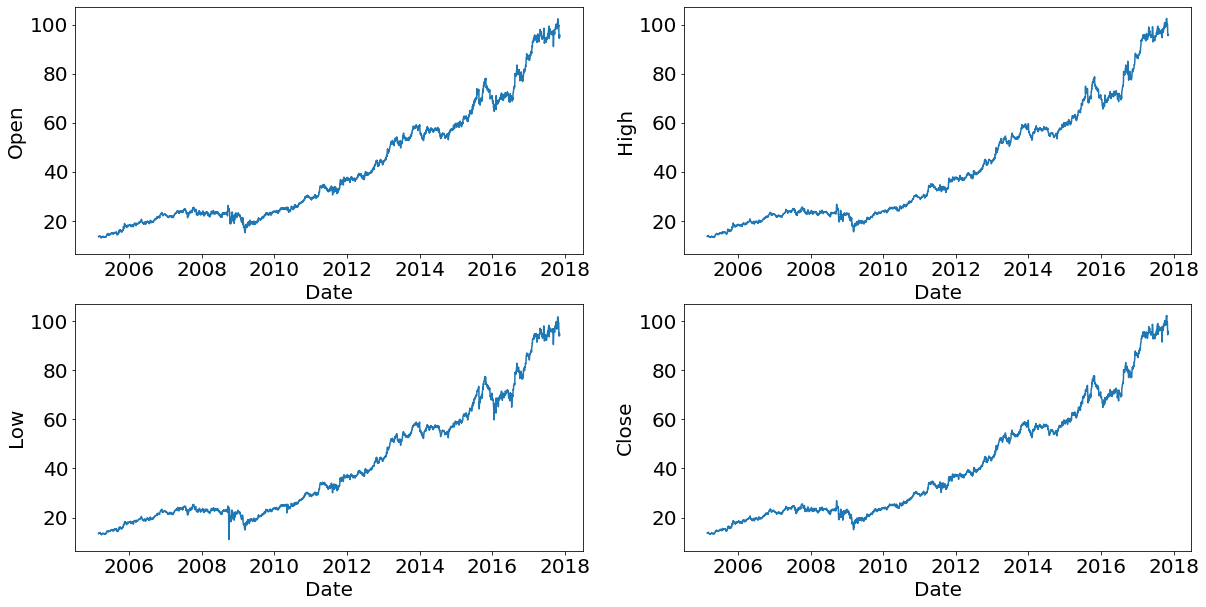

In [9]:
rcParams['figure.figsize'] = 20, 10
rcParams['font.size']=20
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1 = sns.lineplot(x="Date", y="Open",
                  markers=True, dashes=False, data=df)
ax2 = fig.add_subplot(222, sharex=ax1, sharey=ax1)
ax2 = sns.lineplot(x="Date", y="High",
                  markers=True, dashes=False, data=df)
ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
ax3 = sns.lineplot(x="Date", y="Low",
                  markers=True, dashes=False, data=df)
ax4 = fig.add_subplot(224, sharex=ax1, sharey=ax1)
ax4 = sns.lineplot(x="Date", y="Close",
                  markers=True, dashes=False, data=df)

In [10]:
df=df[['Date','Open','High','Low','Close']]
df=df.set_index('Date')

In [11]:
df.head(10)

,Open,High,Low,Close
Date,,,,
2005-02-25,13.583,13.693,13.430,13.693
2005-02-28,13.697,13.827,13.540,13.827
2005-03-01,13.780,13.913,13.720,13.760
2005-03-02,13.717,13.823,13.667,13.810
2005-03-03,13.783,13.783,13.587,13.630
2005-03-04,13.700,13.903,13.620,13.903
2005-03-07,13.917,14.053,13.897,13.987
2005-03-08,13.987,14.067,13.873,13.890
2005-03-09,13.930,13.960,13.813,13.817


In [12]:
df_close = df[['Close']]

In [13]:
df_close.head()

,Close
Date,
2005-02-25,13.693
2005-02-28,13.827
2005-03-01,13.760
2005-03-02,13.810
2005-03-03,13.630


In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df_close)

MinMaxScaler()

In [15]:
stocks=scaler.transform(df_close)

In [16]:
import pickle
with open(file="scaler.pkl",mode="wb") as file:
    pickle.dump(obj=scaler,file=file)

In [17]:
train = int(len(stocks) * 0.80)
test = len(stocks) - train

In [18]:
print(train, test)

2560 641


In [19]:
train = stocks[0:train]
print(train)
type(train)

[[0.00575112]
 [0.00725336]
 [0.00650224]
 ...
 [0.53329596]
 [0.53643498]
 [0.53318386]]


numpy.ndarray

In [20]:
test = stocks[len(train) : ]

In [21]:
print(train.shape , test.shape)

(2560, 1) (641, 1)


In [22]:
train[0]

array([0.00575112])

In [23]:
def process_data(data, n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        print(data[i])
        a = data[i:(i+n_features), 0]
        print(a)
        dataX.append(a)
        b = (data[i+n_features, 0])
        print(b)
        dataY.append(data[i+n_features, 0])
    return np.array(dataX), np.array(dataY)

In [24]:


n_features = 2

trainX, trainY = process_data(train, n_features)
testX, testY = process_data(test, n_features)

[0.00575112]
[0.00575112 0.00725336]
0.006502242152466364
[0.00725336]
[0.00725336 0.00650224]
0.007062780269058294
[0.00650224]
[0.00650224 0.00706278]
0.005044843049327369
[0.00706278]
[0.00706278 0.00504484]
0.008105381165919301
[0.00504484]
[0.00504484 0.00810538]
0.009047085201793731
[0.00810538]
[0.00810538 0.00904709]
0.007959641255605387
[0.00904709]
[0.00904709 0.00795964]
0.007141255605381175
[0.00795964]
[0.00795964 0.00714126]
0.006760089686098647
[0.00714126]
[0.00714126 0.00676009]
0.005235426008968619
[0.00676009]
[0.00676009 0.00523543]
0.004899103139013455
[0.00523543]
[0.00523543 0.0048991 ]
0.005459641255605385
[0.0048991]
[0.0048991  0.00545964]
0.004069506726457395
[0.00545964]
[0.00545964 0.00406951]
0.004114349775784759
[0.00406951]
[0.00406951 0.00411435]
0.0015358744394618762
[0.00411435]
[0.00411435 0.00153587]
0.0015695067264573925
[0.00153587]
[0.00153587 0.00156951]
0.00014573991031388567
[0.00156951]
[0.00156951 0.00014574]
0.0004820627802690769
[0.0001457

0.10119955156950675
[0.10052691]
[0.10052691 0.10119955]
0.09929372197309416
[0.10119955]
[0.10119955 0.09929372]
0.09652466367713006
[0.09929372]
[0.09929372 0.09652466]
0.09655829596412557
[0.09652466]
[0.09652466 0.0965583 ]
0.09386771300448432
[0.0965583]
[0.0965583  0.09386771]
0.09372197309417041
[0.09386771]
[0.09386771 0.09372197]
0.09618834080717492
[0.09372197]
[0.09372197 0.09618834]
0.09357623318385652
[0.09618834]
[0.09618834 0.09357623]
0.0921860986547085
[0.09357623]
[0.09357623 0.0921861 ]
0.09327354260089687
[0.0921861]
[0.0921861  0.09327354]
0.09349775784753364
[0.09327354]
[0.09327354 0.09349776]
0.09360986547085204
[0.09349776]
[0.09349776 0.09360987]
0.09442825112107625
[0.09360987]
[0.09360987 0.09442825]
0.09716367713004487
[0.09442825]
[0.09442825 0.09716368]
0.0968273542600897
[0.09716368]
[0.09716368 0.09682735]
0.10000000000000003
[0.09682735]
[0.09682735 0.1       ]
0.10075112107623321
[0.1]
[0.1        0.10075112]
0.10075112107623321
[0.10075112]
[0.100751

[0.11625561 0.1171861 ]
0.11247757847533635
[0.1171861]
[0.1171861  0.11247758]
0.11289237668161434
[0.11247758]
[0.11247758 0.11289238]
0.11121076233183858
[0.11289238]
[0.11289238 0.11121076]
0.10781390134529151
[0.11121076]
[0.11121076 0.1078139 ]
0.10971973094170401
[0.1078139]
[0.1078139  0.10971973]
0.11121076233183858
[0.10971973]
[0.10971973 0.11121076]
0.11386771300448434
[0.11121076]
[0.11121076 0.11386771]
0.11364349775784754
[0.11386771]
[0.11386771 0.1136435 ]
0.11524663677130048
[0.1136435]
[0.1136435  0.11524664]
0.11729820627802695
[0.11524664]
[0.11524664 0.11729821]
0.1168946188340807
[0.11729821]
[0.11729821 0.11689462]
0.11614349775784755
[0.11689462]
[0.11689462 0.1161435 ]
0.11535874439461885
[0.1161435]
[0.1161435  0.11535874]
0.11412556053811662
[0.11535874]
[0.11535874 0.11412556]
0.11662556053811657
[0.11412556]
[0.11412556 0.11662556]
0.11326233183856504
[0.11662556]
[0.11662556 0.11326233]
0.11465246636771304
[0.11326233]
[0.11326233 0.11465247]
0.1127802690

[0.1004148  0.09906951]
0.10070627802690585
[0.09906951]
[0.09906951 0.10070628]
0.10269058295964129
[0.10070628]
[0.10070628 0.10269058]
0.10933856502242151
[0.10269058]
[0.10269058 0.10933857]
0.10658071748878928
[0.10933857]
[0.10933857 0.10658072]
0.10463004484304933
[0.10658072]
[0.10658072 0.10463004]
0.10362107623318384
[0.10463004]
[0.10463004 0.10362108]
0.10280269058295965
[0.10362108]
[0.10362108 0.10280269]
0.1041816143497758
[0.10280269]
[0.10280269 0.10418161]
0.110347533632287
[0.10418161]
[0.10418161 0.11034753]
0.1143834080717489
[0.11034753]
[0.11034753 0.11438341]
0.11415919282511211
[0.11438341]
[0.11438341 0.11415919]
0.11008968609865472
[0.11415919]
[0.11415919 0.11008969]
0.1126681614349776
[0.11008969]
[0.11008969 0.11266816]
0.10952914798206276
[0.11266816]
[0.11266816 0.10952915]
0.11292600896860988
[0.10952915]
[0.10952915 0.11292601]
0.11547085201793722
[0.11292601]
[0.11292601 0.11547085]
0.11285874439461885
[0.11547085]
[0.11547085 0.11285874]
0.1146076233

[0.22600897]
[0.22600897 0.22029148]
0.21827354260089687
[0.22029148]
[0.22029148 0.21827354]
0.21457399103139013
[0.21827354]
[0.21827354 0.21457399]
0.21569506726457405
[0.21457399]
[0.21457399 0.21569507]
0.21401345291479829
[0.21569507]
[0.21569507 0.21401345]
0.21917040358744394
[0.21401345]
[0.21401345 0.2191704 ]
0.21905829596412557
[0.2191704]
[0.2191704 0.2190583]
0.22331838565022427
[0.2190583]
[0.2190583  0.22331839]
0.23946188340807179
[0.22331839]
[0.22331839 0.23946188]
0.2353139013452915
[0.23946188]
[0.23946188 0.2353139 ]
0.2315022421524664
[0.2353139]
[0.2353139  0.23150224]
0.23116591928251118
[0.23150224]
[0.23150224 0.23116592]
0.22757847533632286
[0.23116592]
[0.23116592 0.22757848]
0.2251121076233184
[0.22757848]
[0.22757848 0.22511211]
0.22331838565022427
[0.22511211]
[0.22511211 0.22331839]
0.21905829596412557
[0.22331839]
[0.22331839 0.2190583 ]
0.2187219730941704
[0.2190583]
[0.2190583  0.21872197]
0.1908071748878924
[0.21872197]
[0.21872197 0.19080717]
0.213

[0.45044843 0.45605381]
0.46356502242152475
[0.45605381]
[0.45605381 0.46356502]
0.45773542600896866
[0.46356502]
[0.46356502 0.45773543]
0.46434977578475345
[0.45773543]
[0.45773543 0.46434978]
0.4704035874439463
[0.46434978]
[0.46434978 0.47040359]
0.47354260089686107
[0.47040359]
[0.47040359 0.4735426 ]
0.4761210762331839
[0.4735426]
[0.4735426  0.47612108]
0.458408071748879
[0.47612108]
[0.47612108 0.45840807]
0.45594170403587453
[0.45840807]
[0.45840807 0.4559417 ]
0.4607623318385651
[0.4559417]
[0.4559417  0.46076233]
0.4637892376681615
[0.46076233]
[0.46076233 0.46378924]
0.46165919282511214
[0.46378924]
[0.46378924 0.46165919]
0.45964125560538116
[0.46165919]
[0.46165919 0.45964126]
0.4595067264573991
[0.45964126]
[0.45964126 0.45950673]
0.46210762331838573
[0.45950673]
[0.45950673 0.46210762]
0.4614349775784754
[0.46210762]
[0.46210762 0.46143498]
0.45896860986547083
[0.46143498]
[0.46143498 0.45896861]
0.4557174887892377
[0.45896861]
[0.45896861 0.45571749]
0.4548206278026906

[0.52533632 0.51984305]
0.5184417040358744
[0.51984305]
[0.51984305 0.5184417 ]
0.512219730941704
[0.5184417]
[0.5184417  0.51221973]
0.5125560538116593
[0.51221973]
[0.51221973 0.51255605]
0.5154708520179372
[0.51255605]
[0.51255605 0.51547085]
0.5208520179372198
[0.51547085]
[0.51547085 0.52085202]
0.5190582959641256
[0.52085202]
[0.52085202 0.5190583 ]
0.5176008968609866
[0.5190583]
[0.5190583 0.5176009]
0.5238789237668161
[0.5176009]
[0.5176009  0.52387892]
0.5234304932735426
[0.52387892]
[0.52387892 0.52343049]
0.5306053811659193
[0.52343049]
[0.52343049 0.53060538]
0.5226457399103139
[0.53060538]
[0.53060538 0.52264574]
0.5334080717488789
[0.52264574]
[0.52264574 0.53340807]
0.5411434977578476
[0.53340807]
[0.53340807 0.5411435 ]
0.5421524663677131
[0.5411435]
[0.5411435  0.54215247]
0.5483183856502243
[0.54215247]
[0.54215247 0.54831839]
0.5482062780269059
[0.54831839]
[0.54831839 0.54820628]
0.5553811659192825
[0.54820628]
[0.54820628 0.55538117]
0.547085201793722
[0.55538117]


[0.74125561 0.73621076]
0.7276905829596414
[0.73621076]
[0.73621076 0.72769058]
0.7224215246636773
[0.72769058]
[0.72769058 0.72242152]
0.7244394618834081
[0.72242152]
[0.72242152 0.72443946]
0.7248878923766817
[0.72443946]
[0.72443946 0.72488789]
0.7367713004484306
[0.72488789]
[0.72488789 0.7367713 ]
0.7158071748878925
[0.7367713]
[0.7367713  0.71580717]
0.7207399103139014
[0.71580717]
[0.71580717 0.72073991]
0.7263452914798207
[0.72073991]
[0.72073991 0.72634529]
0.7160313901345292
[0.72634529]
[0.72634529 0.71603139]
0.7188340807174888
[0.71603139]
[0.71603139 0.71883408]
0.7247757847533632
[0.71883408]
[0.71883408 0.72477578]
0.7174887892376683
[0.72477578]
[0.72477578 0.71748879]
0.7323991031390136
[0.71748879]
[0.71748879 0.7323991 ]
0.7357623318385651
[0.7323991]
[0.7323991  0.73576233]
0.7404708520179374
[0.73576233]
[0.73576233 0.74047085]
0.7492152466367714
[0.74047085]
[0.74047085 0.74921525]
0.7618834080717489
[0.74921525]
[0.74921525 0.76188341]
0.7645739910313901
[0.7618

In [25]:
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(2557, 2) (2557,) (638, 2) (638,)


In [26]:
x_train=trainX.reshape(trainX.shape[0],trainX.shape[1],1)

In [27]:
x_train

array([[[0.00575112],
        [0.00725336]],

       [[0.00725336],
        [0.00650224]],

       [[0.00650224],
        [0.00706278]],

       ...,

       [[0.53934978],
        [0.53901345]],

       [[0.53901345],
        [0.53873318]],

       [[0.53873318],
        [0.53329596]]])

In [28]:
x_test=testX.reshape(testX.shape[0],testX.shape[1],1)

In [29]:
x_test

array([[[0.53251121],
        [0.5382287 ]],

       [[0.5382287 ],
        [0.54316143]],

       [[0.54316143],
        [0.54125561]],

       ...,

       [[0.91165919],
        [0.92343049]],

       [[0.92343049],
        [0.9235426 ]],

       [[0.9235426 ],
        [0.92230942]]])

In [30]:
x_train.shape

(2557, 2, 1)

In [31]:
x_test.shape

(638, 2, 1)

In [32]:
trainY

array([0.00650224, 0.00706278, 0.00504484, ..., 0.53873318, 0.53329596,
       0.53643498])

In [33]:
trainX[0]

array([0.00575112, 0.00725336])

## Model LSTM

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense,Activation

In [35]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(x_train.shape[1],x_train.shape[2]), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 32)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


In [37]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad',metrics = ['mae']) # Try mae, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
2557/2557 - 12s - loss: 0.0326 - mae: 0.1323 - 12s/epoch - 5ms/step
Epoch 2/50
2557/2557 - 11s - loss: 0.0232 - mae: 0.1275 - 11s/epoch - 4ms/step
Epoch 3/50
2557/2557 - 12s - loss: 0.0217 - mae: 0.1263 - 12s/epoch - 5ms/step
Epoch 4/50
2557/2557 - 11s - loss: 0.0207 - mae: 0.1247 - 11s/epoch - 4ms/step
Epoch 5/50
2557/2557 - 15s - loss: 0.0198 - mae: 0.1222 - 15s/epoch - 6ms/step
Epoch 6/50
2557/2557 - 15s - loss: 0.0188 - mae: 0.1196 - 15s/epoch - 6ms/step
Epoch 7/50
2557/2557 - 15s - loss: 0.0179 - mae: 0.1170 - 15s/epoch - 6ms/step
Epoch 8/50
2557/2557 - 16s - loss: 0.0170 - mae: 0.1139 - 16s/epoch - 6ms/step
Epoch 9/50
2557/2557 - 15s - loss: 0.0161 - mae: 0.1112 - 15s/epoch - 6ms/step
Epoch 10/50
2557/2557 - 15s - loss: 0.0152 - mae: 0.1079 - 15s/epoch - 6ms/step
Epoch 11/50
2557/2557 - 15s - loss: 0.0143 - mae: 0.1048 - 15s/epoch - 6ms/step
Epoch 12/50
2557/2557 - 15s - loss: 0.0134 - mae: 0.1016 - 15s/epoch - 6ms/step
Epoch 13/50
2557/2557 - 17s - loss: 0.0125 - mae:

In [38]:
model.save("LSTMModel/Lstm_model.h5")

In [39]:
pred = model.predict(testX)
pred = pred.reshape(-1,1)
pred = scaler.inverse_transform(pred)
predict = pred[:10]
y_pred = pred

20/20 [==============================] - 1s 2ms/step


In [40]:
testY = testY.reshape(testY.shape[0] , 1)
testY = scaler.inverse_transform(testY)
actual = testY[:10]
y_test = testY

In [41]:
predict

array([[60.114166],
       [60.567642],
       [60.764503],
       [60.753487],
       [61.15648 ],
       [61.66244 ],
       [61.869934],
       [61.86213 ],
       [61.645195],
       [61.973946]], dtype=float32)

In [42]:
actual

array([[61.63 ],
       [61.46 ],
       [61.71 ],
       [62.44 ],
       [62.67 ],
       [62.88 ],
       [62.51 ],
       [62.505],
       [63.45 ],
       [63.1  ]])

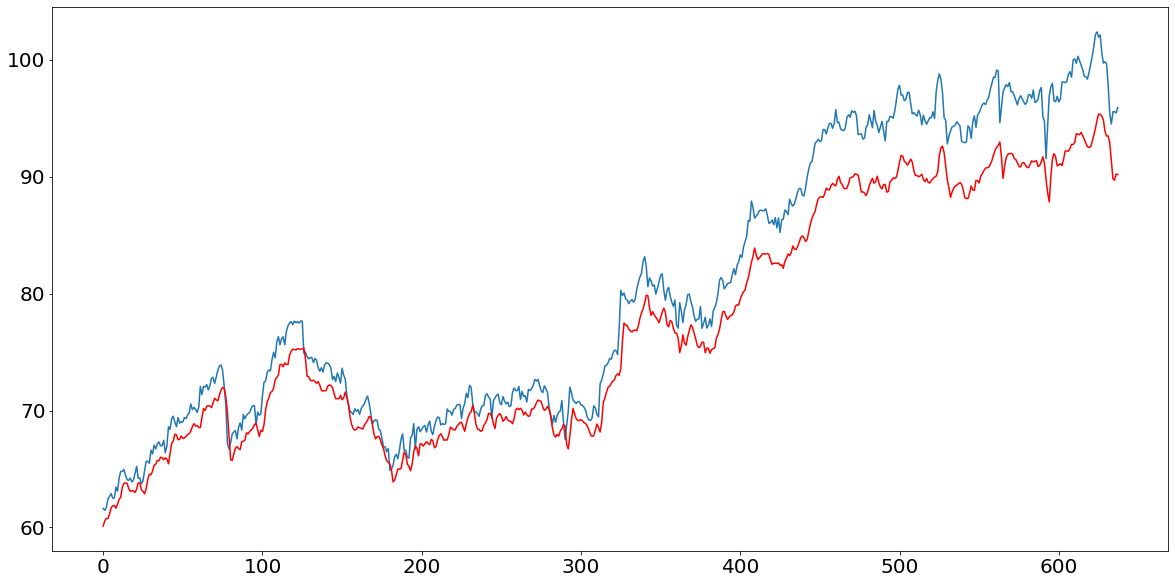

In [43]:
plt.figure(figsize=(20,10))
plt.plot(y_test)
plt.plot(y_pred, color='red')
plt.show()

In [44]:
from sklearn import metrics
def forecast_accuracy(y_test, y_pred):
    print('Mean Error:', np.mean(y_pred-y_test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
forecast_accuracy(y_test,y_pred)

Mean Error: -3.059504453920945
Mean Absolute Error: 3.081883741114506
Root Mean Squared Error: 3.6314721563215904


# Done